# Lab 14 Template              

Proving that the SNe data is consistent with the BenchMark Cosmology.


Before we get started, let's execute the following cell which is almost always needed for our notebooks:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.constants import c

# Importing the solutions from Lab 13
from Lab13_Soln import CosmologicalTools

In [3]:

# Define the benchmark cosmology at z =0
# Planck 2016 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM0_planck = 0.308   # Matter Density Parameter
OmegaR0_planck = 8.24e-5  # Radiation Density Parameter
OmegaL0_planck = 0.692  # Dark Energy Density Parameter
h_planck = 0.6781   # Hubble Constant  100 h km/s/Mpc


In [5]:
# Define the Einstein-DeSitter cosmology (Matter Dominated)
OmegaMD = 1
OmegaRD = 0
OmegaLD = 0
# h is the same = h_planck

In [7]:
# Initialize Instances of the Cosmological Tools Class. 
BenchMark = CosmologicalTools(OmegaM0_planck,OmegaR0_planck,OmegaL0_planck,h_planck)
EinsteinDeSitter = CosmologicalTools(OmegaMD,OmegaRD,OmegaLD,h_planck)



In this exercise we will use data from the Supernova Cosmology project, one of the two teams which first found that the expansion rate of the Universe is accelerating in 1999. A simple introduction to the methods and findings of the SCP group can be found at https://newscenter.lbl.gov/2009/10/27/evolving-dark-energy/. The original paper is Perlmutter *et al.* 1999, "Measurement of $\Omega$ and $\Lambda$ from 42 High Redshift Supernovae", The Astrophysical Journal, Vol. 517, page 565.

The data set we will be using is a more recent sample, containing observations of 580 supernovae, known as the Union 2.1 sample from the paper Suzuki *et al*. 2012, "THE *HUBBLE SPACE TELESCOPE* CLUSTER SUPERNOVA SURVEY. V. IMPROVING THE DARK-ENERGY CONSTRAINTS ABOVE $z>1$ AND BUILDING AN EARLY-TYPE-HOSTED SUPERNOVA SAMPLE", The Astrophysical Journal, vol. 746, page 85.

The data are in the file SNeData.txt.

Take a look at the file using the `with` statement. 

One should always close files when finished using them.
The `with` statement makes this automatic.

Lets simply open the file and print out the first 10 lines to see how the file is formatted:

In [9]:
with open('SNeData.txt', 'r') as infile:
    for i in range(10):
        line = infile.readline()
        line = line.rstrip("\n")
        print(line)

# Supernova Cosmology Project Union2.1 Data
#  Suzuki et al. 
#Name z DistMod DistModErr ProbLowMassHost
1993ah 0.028488        35.3465833928 0.223905932998  0.128418942246
1993ag 0.050043        36.6823679154 0.166828851413  0.128418942246
1993o  0.052926        36.8176912545 0.1557559148    0.128418942246
1993b  0.070086        37.4467365424 0.158466934433  0.128418942246
1992bs 0.062668        37.4834093505 0.156099434739  0.128418942246
1992br 0.087589        38.2290570494 0.187745679272  0.128418942246
1992bp 0.078577        37.4881622607 0.155635656185  0.128418942246


The top of any good data file intended for sharing with others contains a "header" -- some lines at the top which describe the contents of the file.

Here we see that the file contains the SCP Union2.1 data, and that the columns are:

 * the name of the supernova
 * the redshift measured from its spectrum
 * its distance modulus
 * an estimate of the measurement error in the distance modulus
 * the probability the supernova occurred in a low-mass host galaxy
 


# Part A

The difference between the absolute magnitude $M$ and the apparent magnitude $m$, a number called the *distance modulus* which depends only upon the distance to the source

$$
\begin{split}
m-M &= - 2.5 \log_{10} \left(\frac{1}{F_0}\frac{L}{4\pi d^2}\right) + 2.5 \log_{10}\left(\frac{1}{F_0}\frac{L}{4\pi(10\ \textrm{pc})^2}\right)  \\
&= 5 \log_{10}\left(\frac{d}{10\ \textrm{pc}}\right)
\end{split}
$$
Because $M$ and $m$ are logarithmic functions, their difference is proportional to the *ratio* of the distance $d$ to 10 pc.

This is the distance measurement given in the data file for the distance to the supernovae. The measured LUMINOSITY distance is then

$$ d_L = 10^{(m-M)/5 +1} \textrm{pc} $$

In [11]:
def Distance_fromMod(mod):

    """ Function to compute the distance using the distance modulus
    PARAMETERS
    ----------
    mod: `float`
        distance modulus (apparent magnitude - absolute magnitude)

    OUTPUTS
    -------
    DL: `float`
        luminiosity distance in Mpc
    """
    
    # Fill this in 
    a = (mod)/5+1
    DL = (10**(a)*u.pc).to(u.Mpc)
    
    return DL

In [13]:
# Read the file in and store the values using `npgenfromtxt`
data = np.genfromtxt('SNeData.txt',names=True,skip_header=2)

In [17]:
print(data['z'][0])

0.028488


In [21]:
print(data['DistMod'][0])

35.3465833928


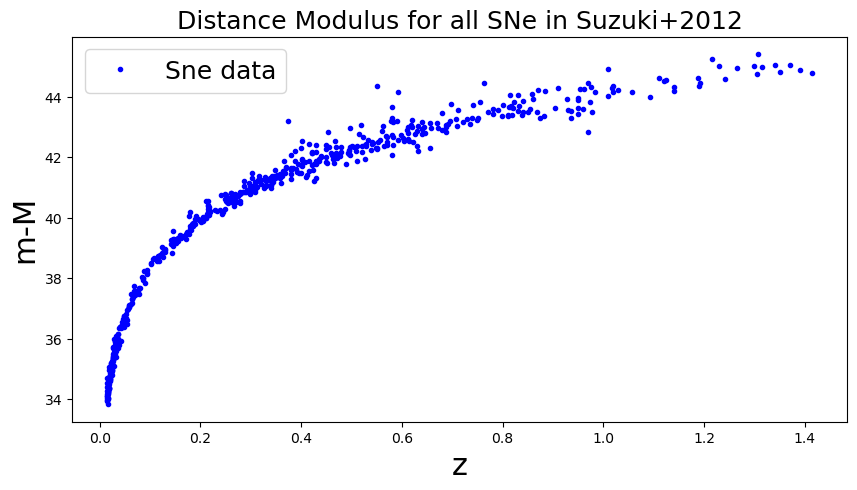

In [25]:
# Create a plot of Distance Modulus Vs. Redshift
# This is Figure 4 of Suzuki et al. 

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

# plot here
ax.plot(data['z'], data['DistMod'], 'b.',label = 'Sne data')
ax.set_xlabel('z', fontsize=22)
ax.set_ylabel('m-M', fontsize=22)
ax.set_title('Distance Modulus for all SNe in Suzuki+2012', fontsize=18)

legend = ax.legend(loc='upper left',fontsize=18)


# Part B

For each SNe in the data file compute: 

1) the luminosity distance, using from the distance modulus;

and

2) the recessional velocity in km/second, computed from the redshift using the relativistic doppler shift at low speeds, where v << c. 

$1+z = \frac{\lambda_{\rm obs}}{\lambda_{\rm e}}$

$z = \frac{\Delta \lambda}{\lambda_{\rm e}} = \frac{v}{c}$

In [29]:
#1) Distance
# Use Distance Modulus to determine the luminosity distance to each supernova
# Distance to each supernova
LD = Distance_fromMod(data['DistMod'])
print(LD[0])

117.30504178865594 Mpc


In [35]:
#2) Velocity
# Determine the recessional speed based on the redshift
#v = c*z
VR = data['z']*c.to(u.km/u.s)
print(VR[0])

8540.487543504 km / s


# Part C

Plot distance versus velocity just for the "nearby" supernovae, those within 200 Mpc of Earth. We can select the set of indices of the nearby supernovae using the `numpy.where` function

In [77]:
# Create an index for the nearby supernovae
near = np.where(LD.value < 200)


In [73]:
# store the number of nearby supernovae
nNear = len(near[0])
print(nNear)

135


In [87]:
print(LD[near])

[117.30504179  85.28526241 185.05120168 151.72753179  82.61206655
 104.02869216 124.77771832 128.83906128  64.38809187  61.40301261
 131.77989092 102.71506208  98.56939149 118.4274597  105.17172881
  66.1200728  155.63530752 188.97404324  93.45330641 145.94977142
  63.60396982  70.02730838 134.87801991  98.80009774  68.58975588
 104.01801062 168.59575097  97.84141984  73.91952018 139.87939823
 108.12343084  63.17504508 197.37298032  75.11978936 104.39403057
  71.14334673 156.47737988  73.92081754  68.03004797 184.87534735
 153.42445033 187.55429983  63.58883373  97.59272406  68.36016129
 157.53393452  70.78593284 133.46332887  96.00855906  58.19983824
  91.35691284 133.55257605 127.07320709  71.06797793 156.90937656
 136.72626066 112.52149706 157.94771845  77.74108228 102.24921193
  89.40922615 137.07061415 147.48187936 108.45189774 158.88354095
 147.36045018 118.0547749   85.5349584  151.07719556  96.47745095
 149.96436065 154.35054535 190.58688219  83.84091588 188.32441008
 119.19516

C:\Users\colin\AppData\Local\Temp\ipykernel_104092\2718214135.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(loc='upper left',fontsize=18)


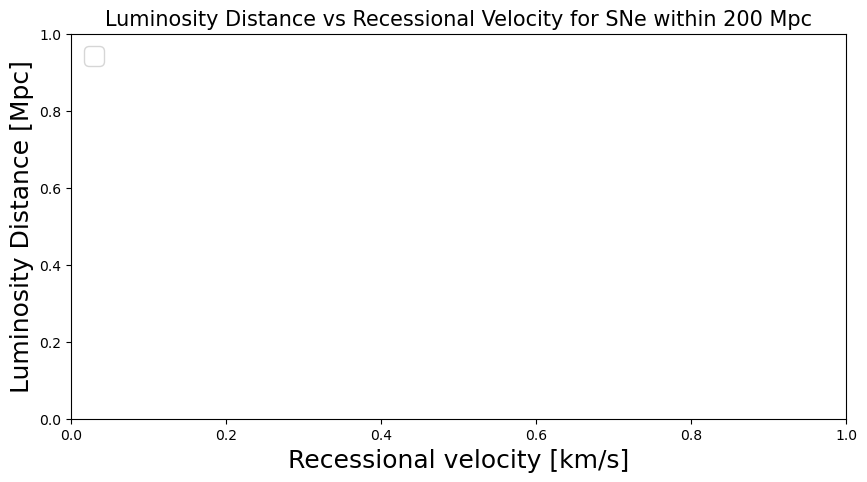

In [81]:
# Plot the Luminosity Distance vs. Recessional Speed for all nearby Supernovae

ax.plot(VR[near],LD[near],'b',label = 'SNe data')

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

# plot nearby SNe

ax.set_xlabel('Recessional velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]', fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for SNe within 200 Mpc",
             fontsize=15)

legend = ax.legend(loc='upper left',fontsize=18)


# Part D

Add a linear model atop the data, using Hubble's Law

 V = Hubble Parameter today * Comoving Radial Distance = H$_o$ D$_c$

In [63]:
# Create a linear model
modelLD = VR/BenchMark.Ho



NameError: name 'nNear' is not defined

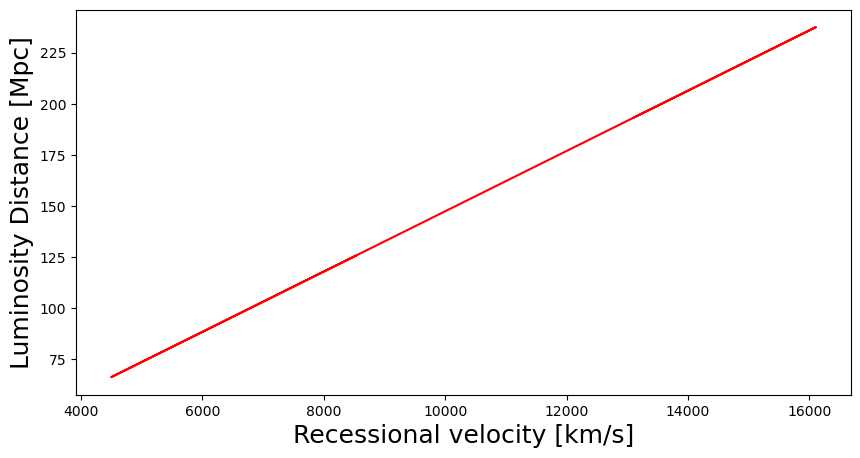

In [65]:
# Add the linear model to the figure of the nearest SNe

ax.plot(VR[number],LD[number],'b',label = 'SNe data')

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

# plot nearby SNe
ax.plot(VR[near],modelLD[near], 'r', label = 'Vr/Ho')
ax.set_xlabel('Recessional velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]', fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for {nNear} SNe within 200 Mpc",
             fontsize=15)
plt.show()
#legend = ax.legend(loc='upper left',fontsize=18)


# Part E
Let's now try plotting the whole dataset, which extends to distances far beyond what Hubble could have measured in his day

In [ ]:
# Plot the whole dataset, not just the nearby SNe

ax.plot(VR[number],LD[number],'b',label = 'SNe data')

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

# plot nearby SNe
ax.plot(VR,modelLD, 'r')
ax.set_xlabel('Recessional velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]', fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for {nNear} SNe within 200 Mpc",
             fontsize=15)
plt.show()
#legend = ax.legend(loc='upper left',fontsize=18)



The distant supernovae are moving more slowly than a constant Ho would predict...

 note that you could import `LambdaCDM` object from `astropy.cosmology` (CDM is "cold dark matter")

`from astropy.cosmology import LambdaCDM`

But instead we're going to use our own code ! 

# Part F

Instead of assuming a linear model, let's use our code to compute a model for the luminosity distance to objects moving with the Hubble flow. 

In [ ]:
# define an array of redshifts to compute the luminosity distance


In [ ]:
# Compute the corresponding recessional velocities using the doppler shift
# z = v/c


In [ ]:
# Generate models for the luminosity distance as a function of z 
# for Benchmark and Einstein De Sitter Cosmologies. 
# Use a list comprehension


In [ ]:
# Plot the new models on top of the data




To determine the best fit, you would test different values of Omega_M and Omega_L and generate probability contours

![title](scp2.1.png)

